# Machine Learning as plug-and-play

In this notebook we will explore some existing packages that allow us to perform machine learning tasks automatically, using pre-existing algorithms and machinery. The advantage of these algorithms is as follows. Literature has developed plenty of small techniques to improve performance, such as different kinds of optimizers, different algorithms, data handling, etc. All of them work more or less in the same way, but the details differ from one to another. These packages have all these elements integrated in the pipeline, and the user can easily tune the models to achieve performance. Since machine learning is a field dominated by heuristic, hence one needs to try many different options.

### Neural Networks

We will use scikit-learn to create and train a neural network in a very well-established problem, which is recognizing handwritten numbers. 

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits, load_iris
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm, cluster


# Load data
digits = load_digits()
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))


X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)



In [2]:
'''
for image in digits.images[:20]:
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.show()
'''

'\nfor image in digits.images[:20]:\n    plt.imshow(image, cmap=plt.cm.gray_r)\n    plt.show()\n'

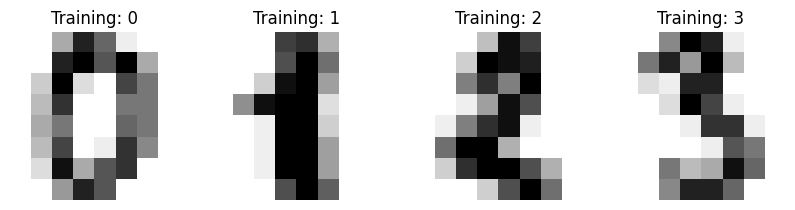

In [3]:
# Let us see our data

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [4]:
# We create now a neural network with custom sizes. Notice that the input will be 8 x 8 = 64 features. 

clf = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(100, 50,25), random_state=1) # The optimizer is automatized and optimal

clf.fit(X_train, y_train)

pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)


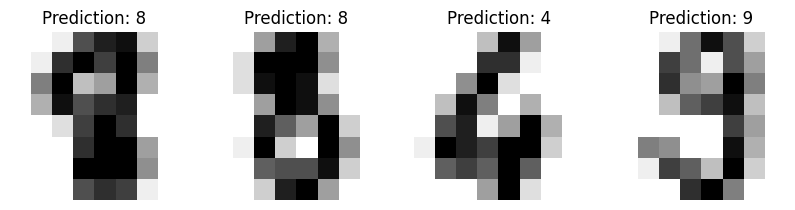

In [5]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, pred_test):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [6]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, pred_test)}\n"
)

Classification report for classifier MLPClassifier(alpha=1e-05, hidden_layer_sizes=(100, 50, 25), random_state=1):
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        88
           1       0.98      0.91      0.94        91
           2       0.94      0.99      0.97        86
           3       0.94      0.82      0.88        91
           4       1.00      0.95      0.97        92
           5       0.90      0.97      0.93        91
           6       0.98      0.99      0.98        91
           7       0.95      0.99      0.97        89
           8       0.93      0.92      0.93        88
           9       0.88      0.96      0.92        92

    accuracy                           0.95       899
   macro avg       0.95      0.95      0.95       899
weighted avg       0.95      0.95      0.95       899




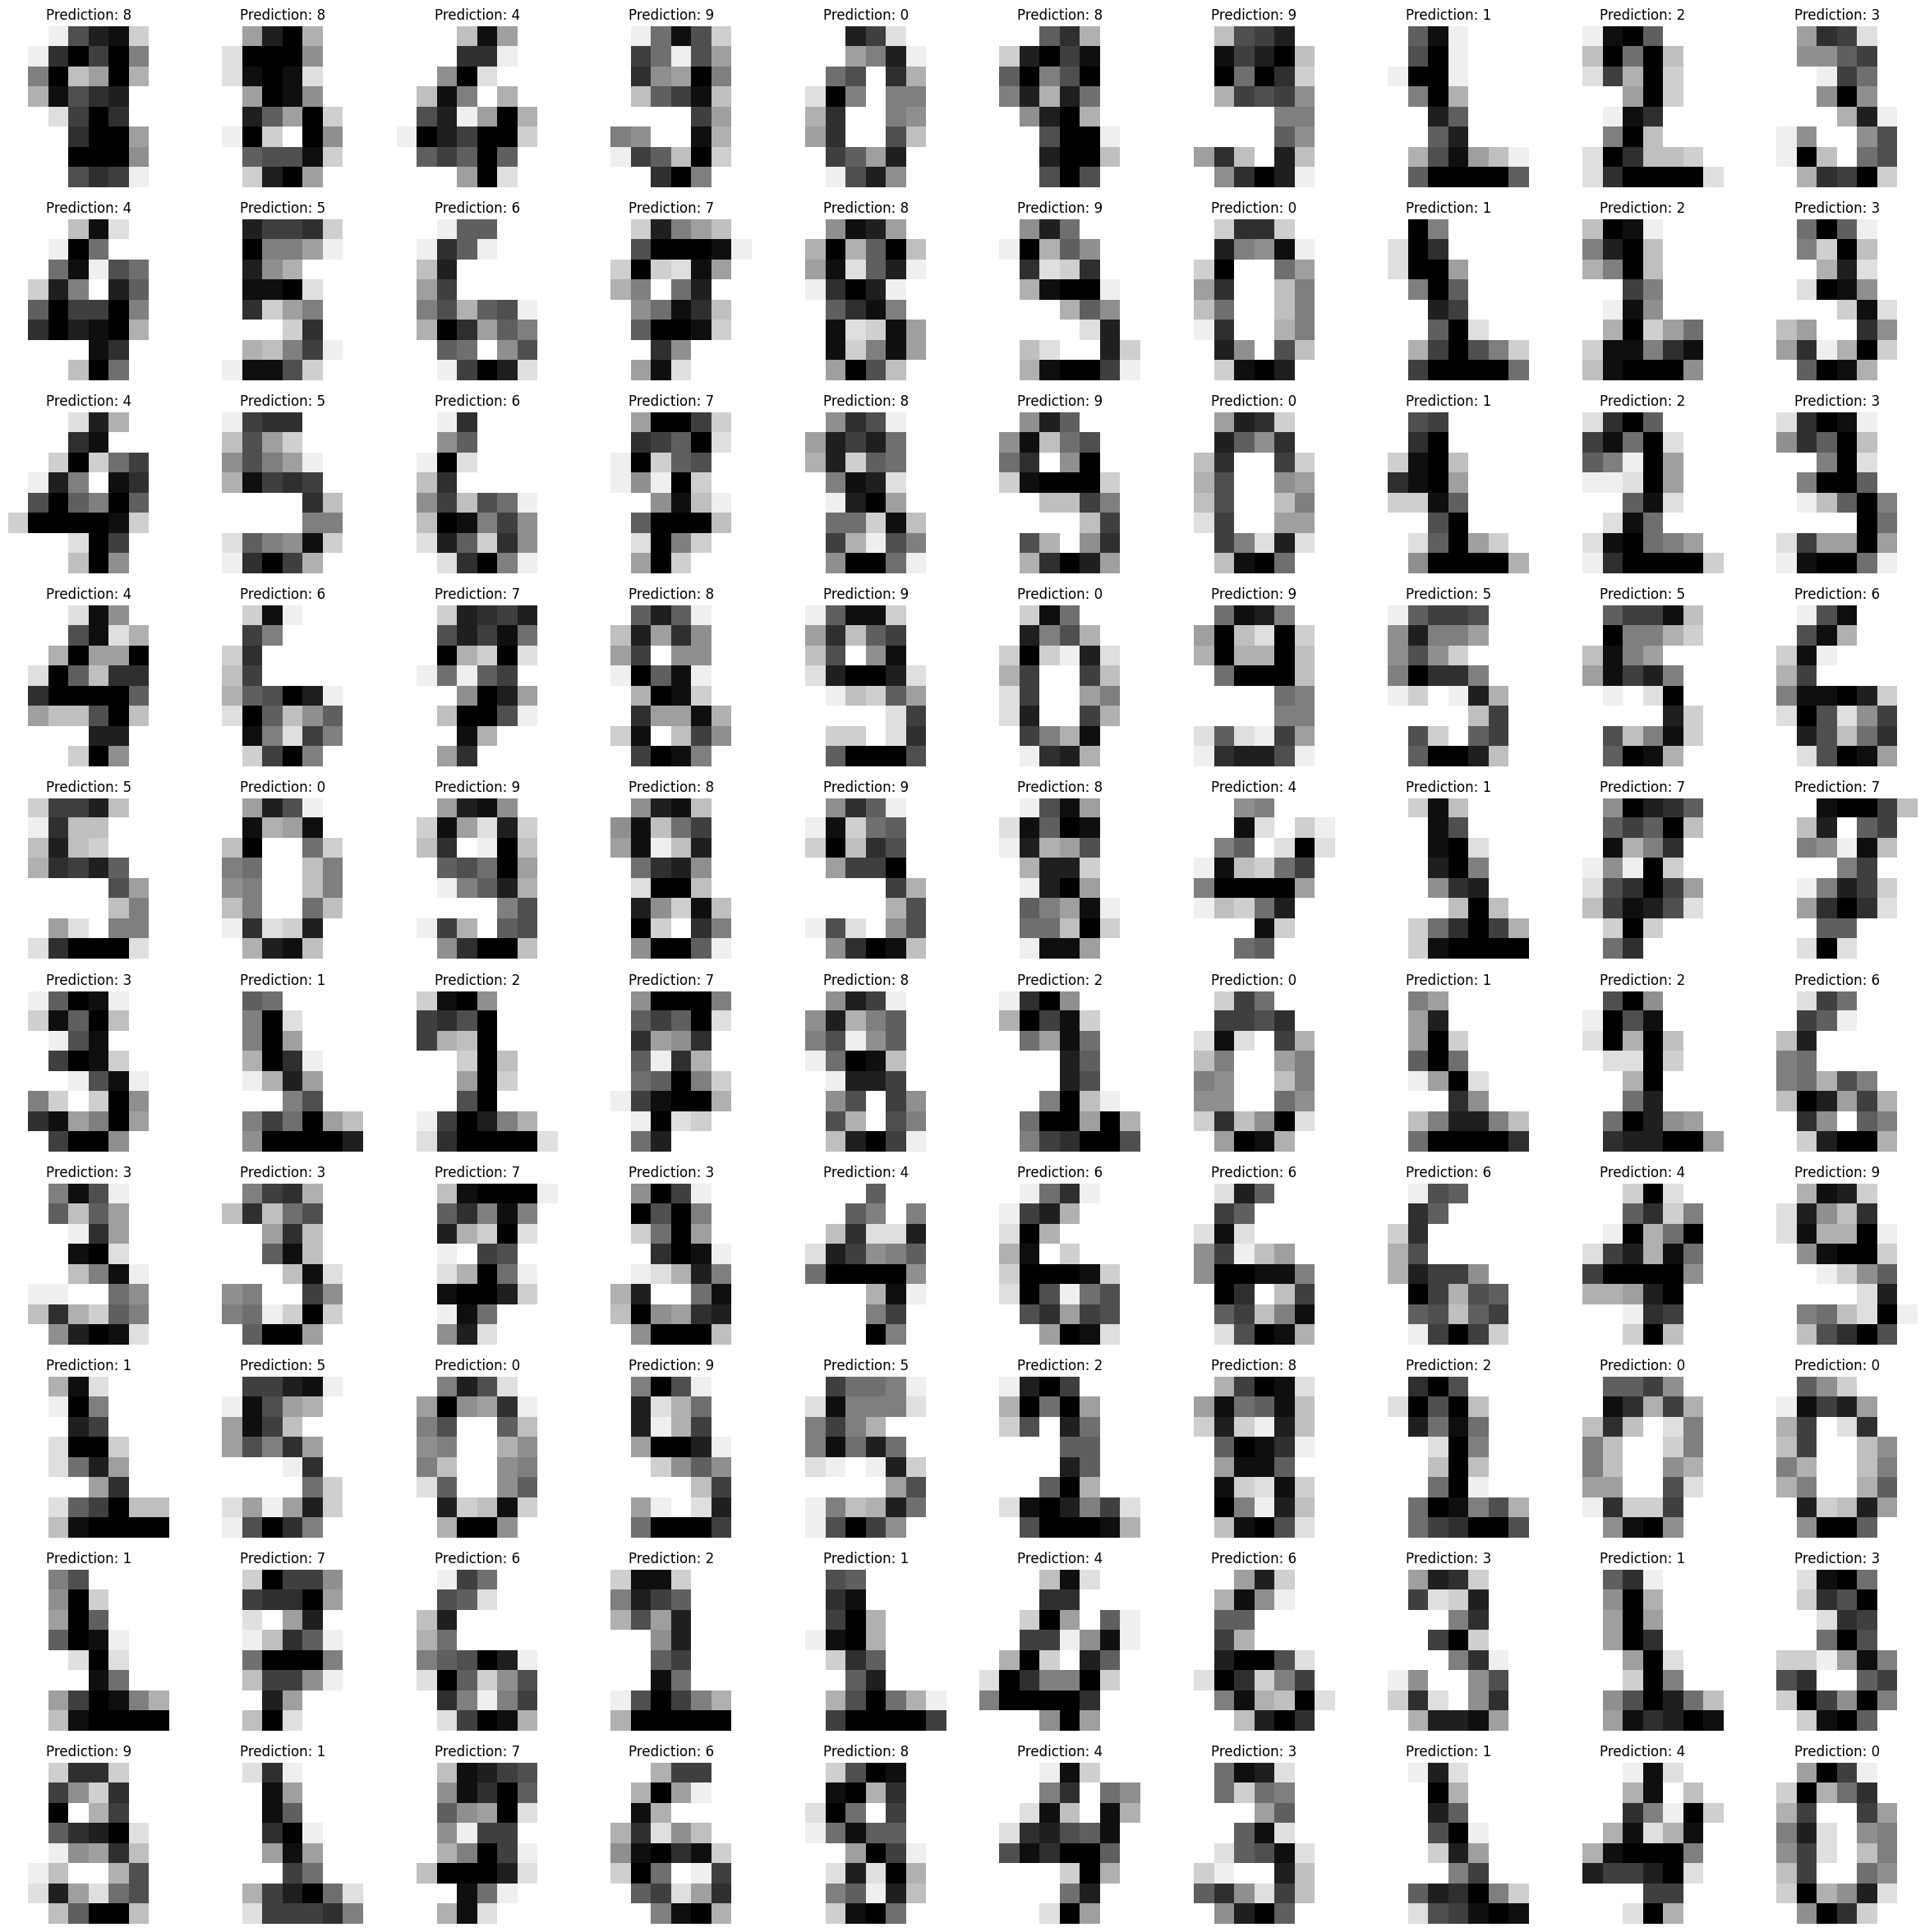

In [7]:
# What went right?

errors = np.where(y_test == pred_test)[0]

x = min(int(np.floor(np.sqrt(len(errors)))), 10)
y = min(int(np.ceil(np.sqrt(len(errors)))), 10)

_, axes = plt.subplots(nrows=x, ncols=y, figsize=(3 * x, 3 * y))
for ax, index in zip(axes.reshape(-1), errors[:x * y]):
    image = X_test[index]
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {pred_test[index]}")

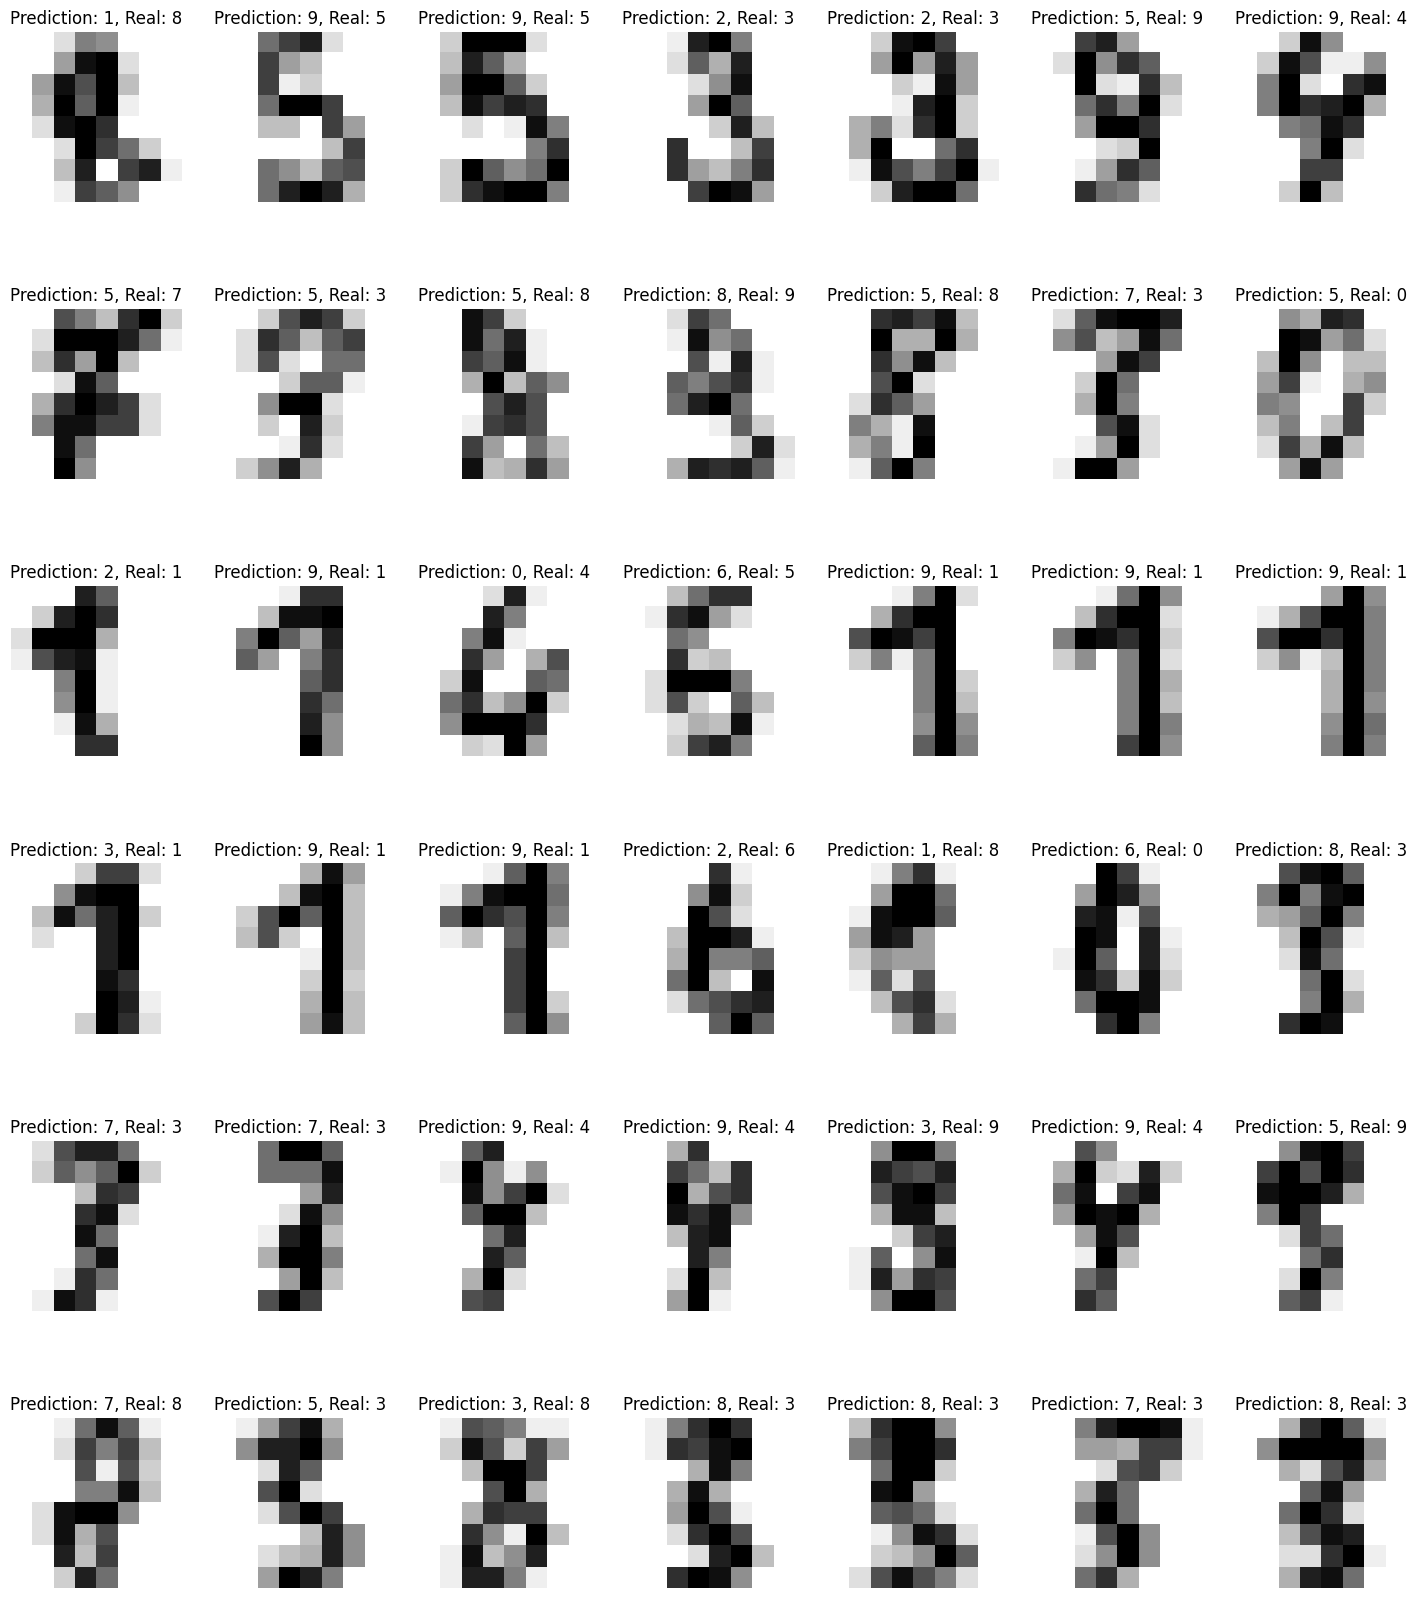

In [8]:
# What went wrong?

errors = np.where(y_test != pred_test)[0]

x = int(np.floor(np.sqrt(len(errors))))
y = int(np.ceil(np.sqrt(len(errors))))

_, axes = plt.subplots(nrows=x, ncols=y, figsize=(3 * x, 3 * y))
for ax, index in zip(axes.reshape(-1), errors[:x * y]):
    image = X_test[index]
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {pred_test[index]}, Real: {y_test[index]}")
    

## Using a support vector machine

We will use now the class named "Support Vector Classifier", which is another name for the SVM. In this class, the program can perform multi-class classification by extending the procedure seen for the binary classification. 

In [9]:
# Initialize the model and train

clf = svm.SVC()

clf.fit(X_train, y_train)

pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.97      0.97      0.97        91
           2       1.00      0.98      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.93      0.97      0.95        91
           6       0.99      0.99      0.99        91
           7       0.95      0.99      0.97        89
           8       0.92      0.95      0.94        88
           9       0.92      0.96      0.94        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899




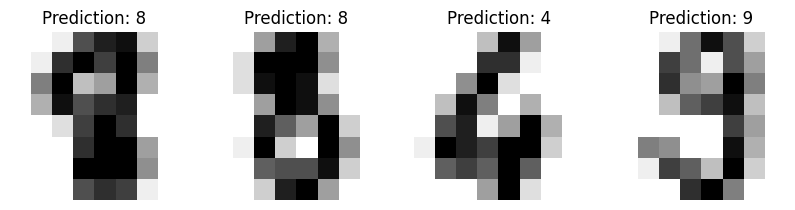

In [10]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, pred_test):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")


print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, pred_test)}\n"
)

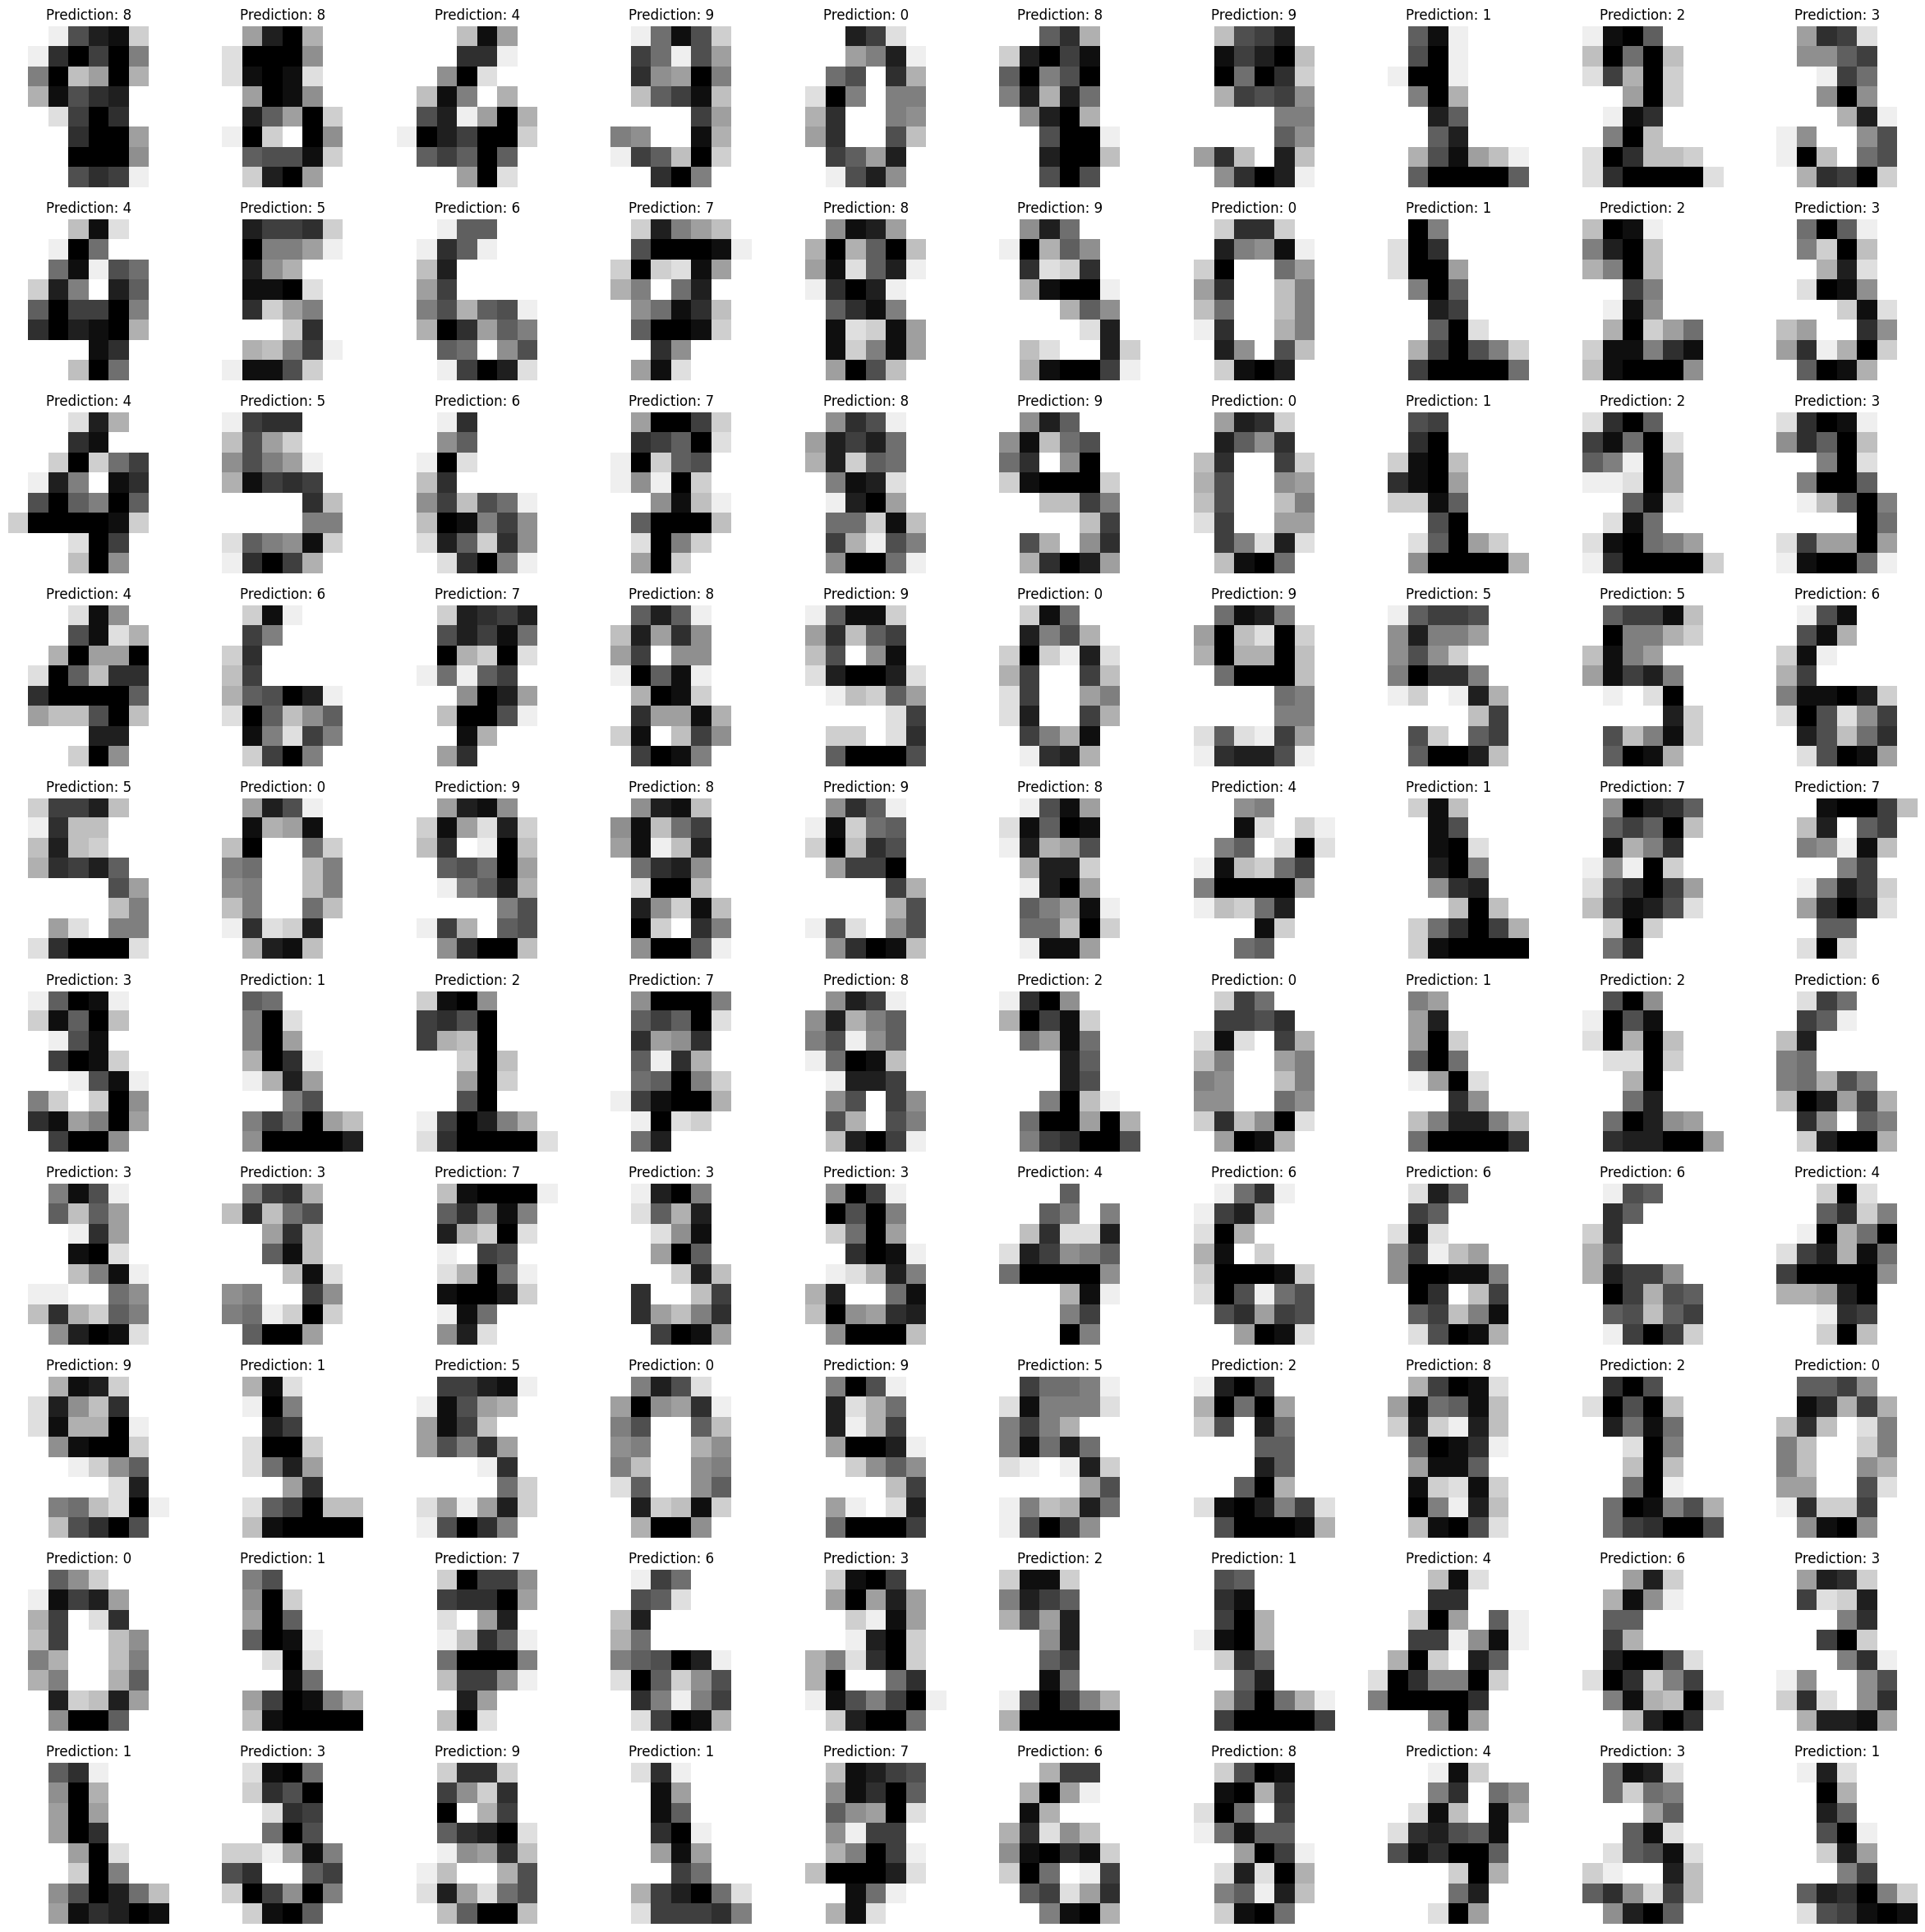

In [11]:
# What went right?

errors = np.where(y_test == pred_test)[0]

x = min(int(np.floor(np.sqrt(len(errors)))), 10)
y = min(int(np.ceil(np.sqrt(len(errors)))), 10)

_, axes = plt.subplots(nrows=x, ncols=y, figsize=(3 * x, 3 * y))
for ax, index in zip(axes.reshape(-1), errors[:x * y]):
    image = X_test[index]
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {pred_test[index]}")
    
    

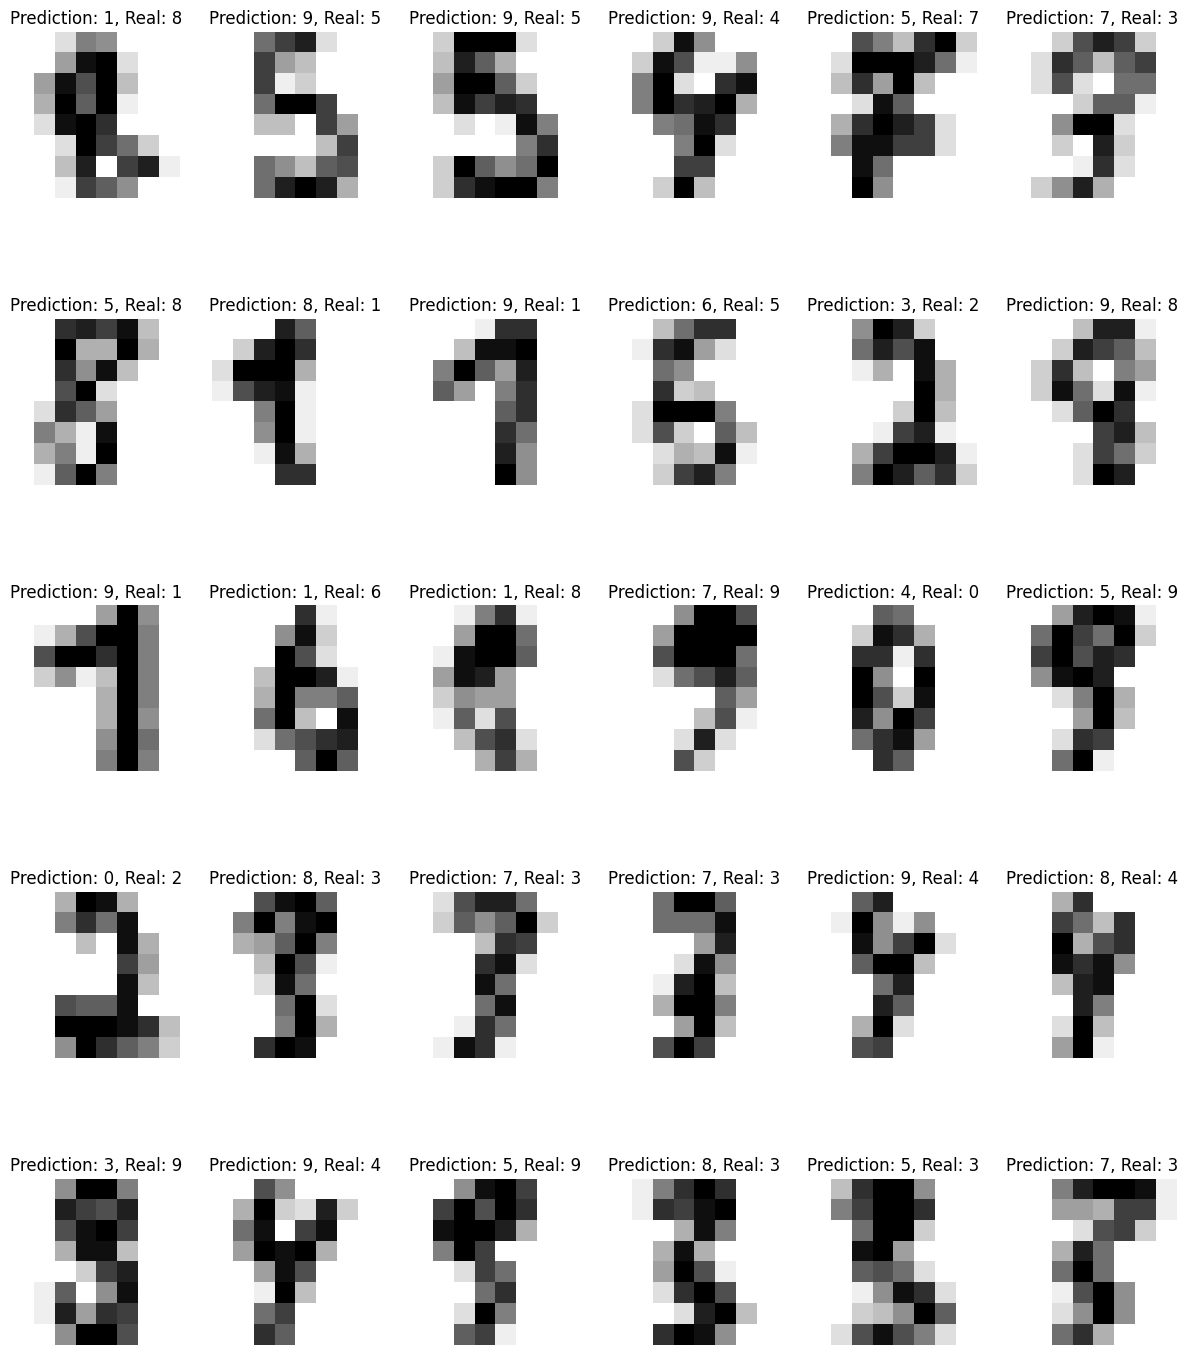

In [12]:
# What went wrong?

errors = np.where(y_test != pred_test)[0]

x = int(np.floor(np.sqrt(len(errors))))
y = int(np.ceil(np.sqrt(len(errors))))

_, axes = plt.subplots(nrows=x, ncols=y, figsize=(3 * x, 3 * y))
for ax, index in zip(axes.reshape(-1), errors[:x * y]):
    image = X_test[index]
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {pred_test[index]}, Real: {y_test[index]}")
    

## Clustering


In this section, we will use scikit to perform a clustering algorithm over synthetic data. We will compare several models.  

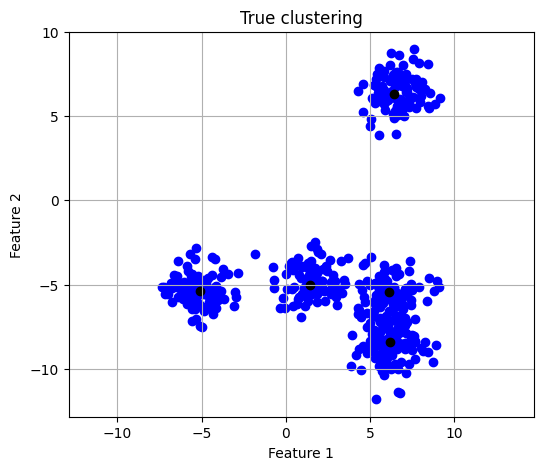

In [21]:
n_clusters = 5

centers = 10 * (1 - 2 * np.random.rand(n_clusters, 2))

data = np.vstack([
    np.vstack([x]*100) + 1 * np.random.randn(100, 2) for x in centers
])

# Create a scatter plot
plt.figure(figsize=(6, 5))

# True labels
plt.scatter(data[:, 0], data[:, 1], color='blue')
plt.scatter(centers[:, 0], centers[:, 1], color='black')

plt.title("True clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis('equal')
#plt.colorbar(label="Class")
plt.grid(True)

In [22]:

X_train, X_test = train_test_split(
    data, test_size=0.5, shuffle=True
)


In [23]:
clf = cluster.KMeans(n_clusters=n_clusters)

clf.fit(X_train)

pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

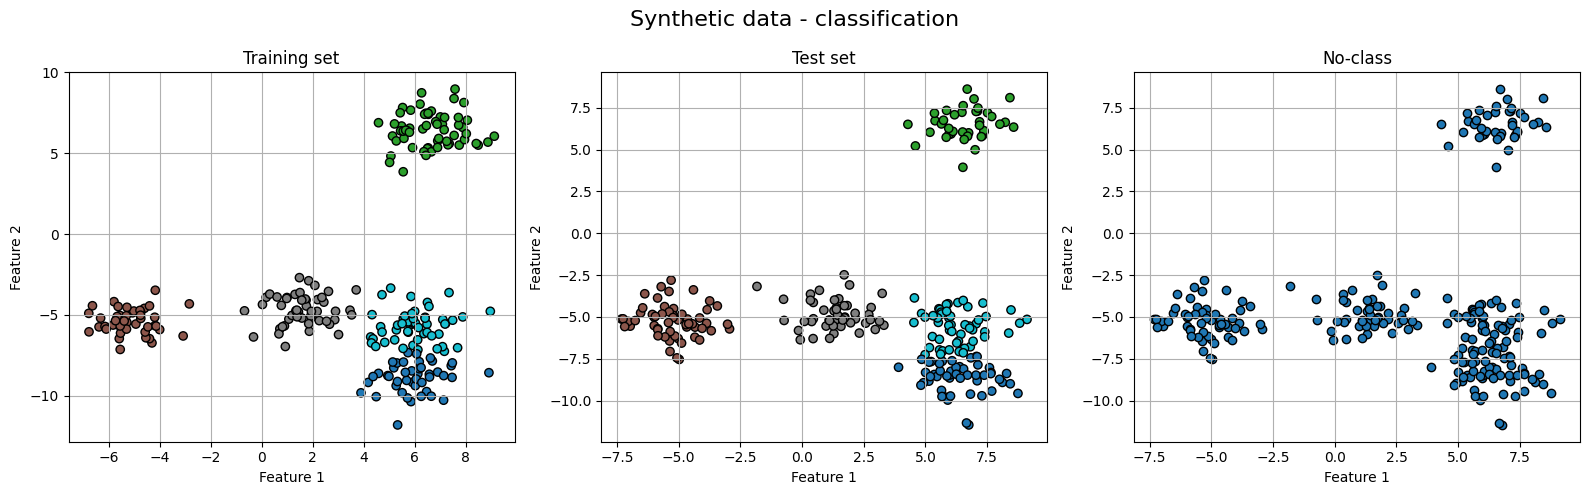

In [24]:
X_train = np.array(X_train)
X_test = np.array(X_test)

# Create a scatter plot
plt.figure(figsize=(16, 5))

# True labels
plt.subplot(1, 3, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=pred_train, cmap="tab10", edgecolor="k")
plt.title("Training set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
#plt.colorbar(label="Class")
plt.grid(True)

# True labels
plt.subplot(1, 3, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred_test, cmap="tab10", edgecolor="k")
plt.title("Test set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
#plt.colorbar(label="Class")
plt.grid(True)

# True labels
plt.subplot(1, 3, 3)
plt.scatter(X_test[:, 0], X_test[:, 1], edgecolor="k")
plt.title("No-class")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
#plt.colorbar(label="Class")
plt.grid(True)



# Add overall title and show plot
plt.suptitle('Synthetic data - classification', fontsize=16)
plt.tight_layout()
plt.show()

### Clustering - iris

We repeat the algorithm, now for the iris dataset.

In [32]:
iris = load_iris()
n_samples = len(iris.data)

data = iris.data


X_train, X_test, y_train, y_test = train_test_split(
    data, iris.target, test_size=0.5, shuffle=True
)


In [33]:
# clf = cluster.AffinityPropagation()
clf = cluster.KMeans(n_clusters = 3)

clf.fit(X_train)

pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

In [34]:
# Class assignment. We do not need this, but it is useful for visualization. 

output_classes = {}
for c in np.unique(pred_test):
    indices = np.where(pred_test == c)
    number, occurrences = np.unique(y_test[indices], return_counts = True)
    output_classes[c] = number[np.argmax(occurrences)]
    

transformed_pred_test = np.array([output_classes[_] for _ in pred_test])
transformed_pred_train = np.array([output_classes[_] for _ in pred_train])


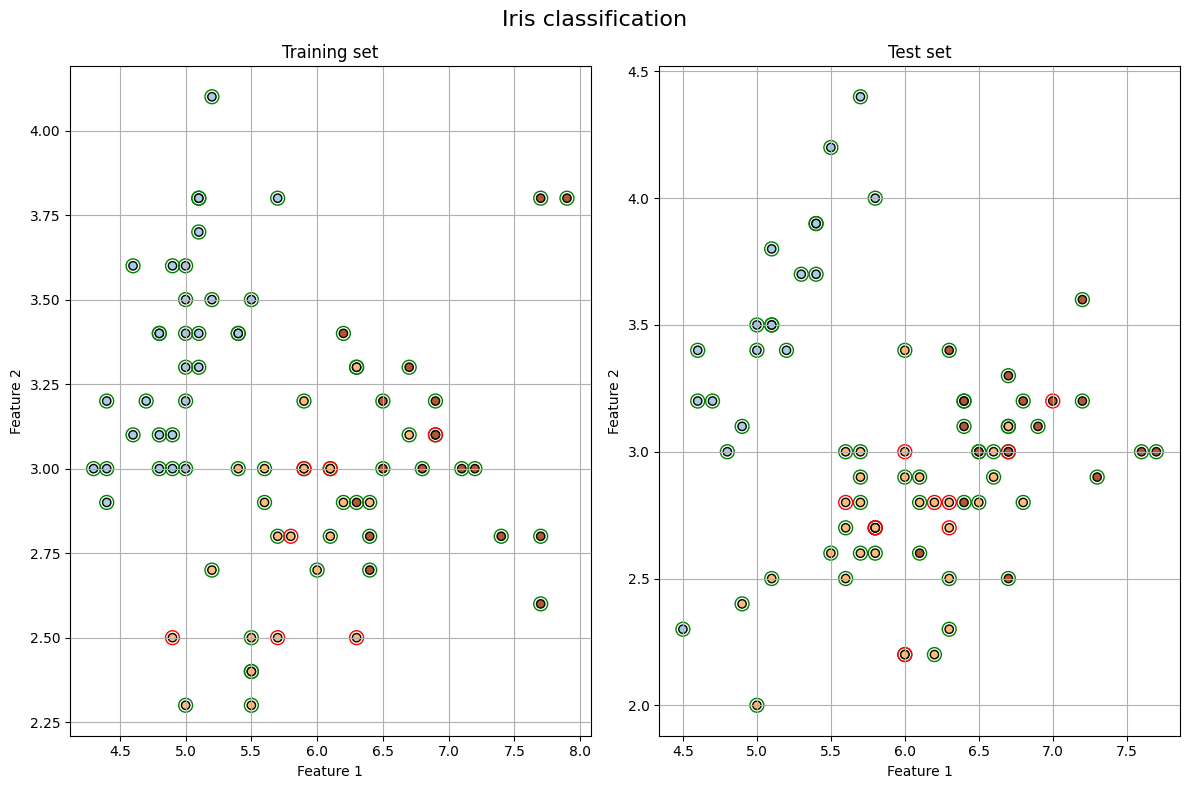

In [35]:
X_train = np.array(X_train)
X_test = np.array(X_test)

# Create a scatter plot
plt.figure(figsize=(12, 8))

# True labels
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=transformed_pred_train, cmap="Paired", edgecolor="k")
correct = y_train == transformed_pred_train
incorrect = ~correct
plt.scatter(X_train[correct, 0], X_train[correct, 1], facecolors='none', edgecolors='green', s=100, label="Correct")
plt.scatter(X_train[incorrect, 0], X_train[incorrect, 1], facecolors='none', edgecolors='red', s=100, label="Incorrect")
plt.title("Training set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
#plt.colorbar(label="Class")
plt.grid(True)

# True labels
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=transformed_pred_test, cmap="Paired", edgecolor="k")
correct = y_test == transformed_pred_test
incorrect = ~correct
plt.scatter(X_test[correct, 0], X_test[correct, 1], facecolors='none', edgecolors='green', s=100, label="Correct")
plt.scatter(X_test[incorrect, 0], X_test[incorrect, 1], facecolors='none', edgecolors='red', s=100, label="Incorrect")
plt.title("Test set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
#plt.colorbar(label="Class")
plt.grid(True)


'''# True labels
plt.subplot(2, 2, 2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="Paired", edgecolor="k")
plt.title("Training set - true")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
#plt.colorbar(label="Class")
plt.grid(True)

# True labels
plt.subplot(2, 2, 4)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="Paired", edgecolor="k")
plt.title("Test set - true")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
#plt.colorbar(label="Class")
plt.grid(True)
'''


# Add overall title and show plot
plt.suptitle('Iris classification', fontsize=16)
plt.tight_layout()
plt.show()

